<a href="https://colab.research.google.com/github/roshantac/EVA4/blob/master/Assignment9/Session9_Gradcam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install albumentations

In [2]:
########################################
#  Calling  heavenly Gods
########################################
import torch
import torchvision
import torchvision.transforms as transforms
from dataset import *
from Resnet import *
import torch.nn as nn
import torch.nn.functional as F
from base_functions import *
from traing import *
from torchsummary import summary

# getting the data
trainloader, testloader, classes = getData()



Files already downloaded and verified
Files already downloaded and verified


In [3]:
# Utilize GPU if available
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = ResNet18().to(device)
if device == 'cuda':
    model = torch.nn.DataParallel(model)
    cudnn.benchmark = True

# Print Model Summary    
summary(model, input_size=(3, 32, 32))


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [4]:
# Training starts here
Training(25,model,device, trainloader, testloader )


  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=1.363119125366211 Batch_id=390 Accuracy=37.61: 100%|██████████| 391/391 [00:34<00:00, 12.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -2.6261, Accuracy: 5217/10000 (52.17%)

EPOCH: 1


Loss=0.8988955616950989 Batch_id=390 Accuracy=54.92: 100%|██████████| 391/391 [00:34<00:00, 12.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.0593, Accuracy: 6340/10000 (63.40%)

EPOCH: 2


Loss=0.9159603118896484 Batch_id=390 Accuracy=66.81: 100%|██████████| 391/391 [00:34<00:00, 11.43it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -4.8286, Accuracy: 7064/10000 (70.64%)

EPOCH: 3


Loss=0.7025729417800903 Batch_id=390 Accuracy=72.69: 100%|██████████| 391/391 [00:34<00:00, 11.40it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.4216, Accuracy: 7569/10000 (75.69%)

EPOCH: 4


Loss=0.7055505514144897 Batch_id=390 Accuracy=76.48: 100%|██████████| 391/391 [00:34<00:00, 13.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -6.6018, Accuracy: 7732/10000 (77.32%)

EPOCH: 5


Loss=0.8047345876693726 Batch_id=390 Accuracy=79.41: 100%|██████████| 391/391 [00:34<00:00, 12.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -7.2916, Accuracy: 8205/10000 (82.05%)

EPOCH: 6


Loss=0.3253524899482727 Batch_id=390 Accuracy=84.29: 100%|██████████| 391/391 [00:34<00:00, 11.38it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.2525, Accuracy: 8571/10000 (85.71%)

EPOCH: 7


Loss=0.4039019048213959 Batch_id=390 Accuracy=85.75: 100%|██████████| 391/391 [00:34<00:00, 12.64it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -8.7426, Accuracy: 8608/10000 (86.08%)

EPOCH: 8


Loss=0.37419965863227844 Batch_id=390 Accuracy=86.66: 100%|██████████| 391/391 [00:34<00:00, 12.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.0049, Accuracy: 8585/10000 (85.85%)

EPOCH: 9


Loss=0.4880095422267914 Batch_id=390 Accuracy=86.90: 100%|██████████| 391/391 [00:34<00:00, 12.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.1242, Accuracy: 8637/10000 (86.37%)

EPOCH: 10


Loss=0.3073914051055908 Batch_id=390 Accuracy=87.43: 100%|██████████| 391/391 [00:34<00:00, 12.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.5458, Accuracy: 8652/10000 (86.52%)

EPOCH: 11


Loss=0.18713876605033875 Batch_id=390 Accuracy=88.08: 100%|██████████| 391/391 [00:34<00:00, 11.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.4010, Accuracy: 8651/10000 (86.51%)

EPOCH: 12


Loss=0.32129037380218506 Batch_id=390 Accuracy=88.83: 100%|██████████| 391/391 [00:34<00:00, 13.02it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.5983, Accuracy: 8711/10000 (87.11%)

EPOCH: 13


Loss=0.5078127384185791 Batch_id=390 Accuracy=89.06: 100%|██████████| 391/391 [00:34<00:00, 11.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.7305, Accuracy: 8727/10000 (87.27%)

EPOCH: 14


Loss=0.2755207121372223 Batch_id=390 Accuracy=89.16: 100%|██████████| 391/391 [00:34<00:00, 12.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.7218, Accuracy: 8706/10000 (87.06%)

EPOCH: 15


Loss=0.26004931330680847 Batch_id=390 Accuracy=88.92: 100%|██████████| 391/391 [00:34<00:00, 12.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.9028, Accuracy: 8716/10000 (87.16%)

EPOCH: 16


Loss=0.22883105278015137 Batch_id=390 Accuracy=89.14: 100%|██████████| 391/391 [00:34<00:00, 11.41it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.9590, Accuracy: 8725/10000 (87.25%)

EPOCH: 17


Loss=0.28807640075683594 Batch_id=390 Accuracy=89.08: 100%|██████████| 391/391 [00:34<00:00, 12.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.8509, Accuracy: 8734/10000 (87.34%)

EPOCH: 18


Loss=0.312127947807312 Batch_id=390 Accuracy=89.34: 100%|██████████| 391/391 [00:34<00:00, 12.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -10.0203, Accuracy: 8723/10000 (87.23%)

EPOCH: 19


Loss=0.2180664986371994 Batch_id=390 Accuracy=89.37: 100%|██████████| 391/391 [00:34<00:00, 11.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.9361, Accuracy: 8732/10000 (87.32%)

EPOCH: 20


Loss=0.3529147505760193 Batch_id=390 Accuracy=89.37: 100%|██████████| 391/391 [00:34<00:00, 12.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.9614, Accuracy: 8744/10000 (87.44%)

EPOCH: 21


Loss=0.307377427816391 Batch_id=390 Accuracy=89.26: 100%|██████████| 391/391 [00:34<00:00, 12.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.9012, Accuracy: 8745/10000 (87.45%)

EPOCH: 22


Loss=0.4077531695365906 Batch_id=390 Accuracy=89.11: 100%|██████████| 391/391 [00:34<00:00, 12.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.9760, Accuracy: 8740/10000 (87.40%)

EPOCH: 23


Loss=0.3580262064933777 Batch_id=390 Accuracy=89.31: 100%|██████████| 391/391 [00:34<00:00, 12.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: -9.9464, Accuracy: 8717/10000 (87.17%)

EPOCH: 24


Loss=0.31745409965515137 Batch_id=390 Accuracy=89.39: 100%|██████████| 391/391 [00:34<00:00, 12.97it/s]



Test set: Average loss: -9.9122, Accuracy: 8737/10000 (87.37%)



In [5]:
# Calsswise accuracy 
ClassTestAccuracy(testloader,device,model,classes)

Accuracy of plane : 95 %
Accuracy of   car : 96 %
Accuracy of  bird : 65 %
Accuracy of   cat : 72 %
Accuracy of  deer : 85 %
Accuracy of   dog : 84 %
Accuracy of  frog : 94 %
Accuracy of horse : 96 %
Accuracy of  ship : 91 %
Accuracy of truck : 93 %


In [6]:
from GradCam import show_map
import matplotlib.pyplot as plt

heat_map, result = show_map()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


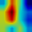

In [7]:
transforms.ToPILImage()(heat_map)

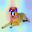

In [8]:
transforms.ToPILImage()(result)